<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_RLabs8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886: R Lab 08

## Edward Sung

## 10/29/24

>[Section 6.5.2 - Ridge Regression and the Lasso](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=3ohDLsCpQRjY)

>>[Ridge Regression](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=8JKzH7m8V_zp)

>>[The Lasso](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=cJMLAdrYWCr6)

>[Lecture 08 R Code](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=zyaENr7NQUB7)

>>[Ridge Regression with glmnet() and train()](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=Ncggt-8oYDXf)

>>[LASSO Regression with glmnet() and train()](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=_LLAerOGYU6O)

>>[Ridge and LASSO Regression for Classification](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=sCnfD8fZYgh9)



# Section 6.5.2 - Ridge Regression and the Lasso

In [81]:
install.packages("ISLR2")
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [82]:
library(ISLR2)
library(glmnet)

In [83]:
Hitters <- na.omit(Hitters)

x <- model.matrix(Salary ~ ., Hitters)[, -1]
y <- Hitters$Salary

## Ridge Regression

In [84]:
library(glmnet)
grid <- 10^seq(10, -2, length = 100)
ridge.mod <- glmnet(x, y, alpha = 0, lambda = grid)

In [85]:
dim(coef(ridge.mod))

[1]  20 100

In [86]:
ridge.mod$lambda[50]

[1] 11497.57

In [87]:
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In [88]:
sqrt(sum(coef(ridge.mod)[-1, 50]^2))

[1] 6.360612

In [89]:
ridge.mod$lambda[60]

[1] 705.4802

In [90]:
coef(ridge.mod)[,60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [91]:
sqrt(sum(coef(ridge.mod)[-1, 60]^2))

[1] 57.11001

In [92]:
predict(ridge.mod, s = 50, type = "coefficients")[1:20, ]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

In [93]:
set.seed(1)
train <- sample(1: nrow(x), nrow(x) / 2)
test <- (-train)
y.test <- y[test]

In [94]:
ridge.mod <- glmnet(x[train, ], y[train], alpha = 0, lambda = grid, thresh = 1e-12)
ridge.pred <- predict(ridge.mod, s = 4, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 142199.2

In [95]:
mean((mean(y[train]) - y.test)^2)

[1] 224669.9

In [96]:
ridge.pred <- predict(ridge.mod, s = 1e10, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 224669.8

In [97]:
ridge.pred <- predict(ridge.mod, s = 0, newx = x[test, ], exact = T, x = x[train, ], y = y[train])
mean((ridge.pred - y.test)^2)

[1] 168588.6

In [98]:
lm(y ~ x, subset = train)
predict(ridge.mod, s = 0, exact = T, type = "coefficients", x = x[train, ], y = y[train])[1:20, ]


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.0200994   -0.3521900   -1.6371383    5.8146692    1.5423361    1.1241837 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7288406  -16.3795195   -0.6411235    3.1629444    3.4005281   -0.9739405 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.6003976    0.3378422  119.1434637 -144.0853061    0.1976300    0.6804200 
      Errors   NewLeagueN 
  -4.7127879  -71.0898914

[1] 326.0828

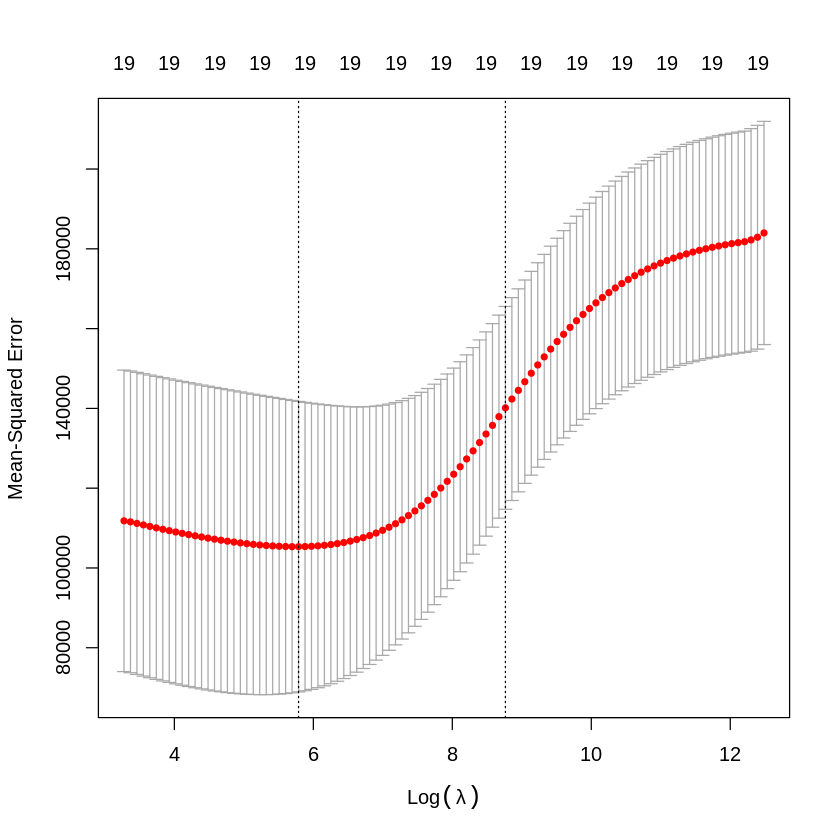

In [99]:
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0)
plot(cv.out)
bestlam <- cv.out$lambda.min
bestlam

In [100]:
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 139856.6

In [101]:
out <- glmnet(x, y, alpha = 0)
predict(out, type = "coefficients", s = bestlam)[1:20, ]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 15.44383120   0.07715547   0.85911582   0.60103106   1.06369007   0.87936105 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.62444617   1.35254778   0.01134999   0.05746654   0.40680157   0.11456224 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12116504   0.05299202  22.09143197 -79.04032656   0.16619903   0.02941950 
      Errors   NewLeagueN 
 -1.36092945   9.12487765

## The Lasso

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


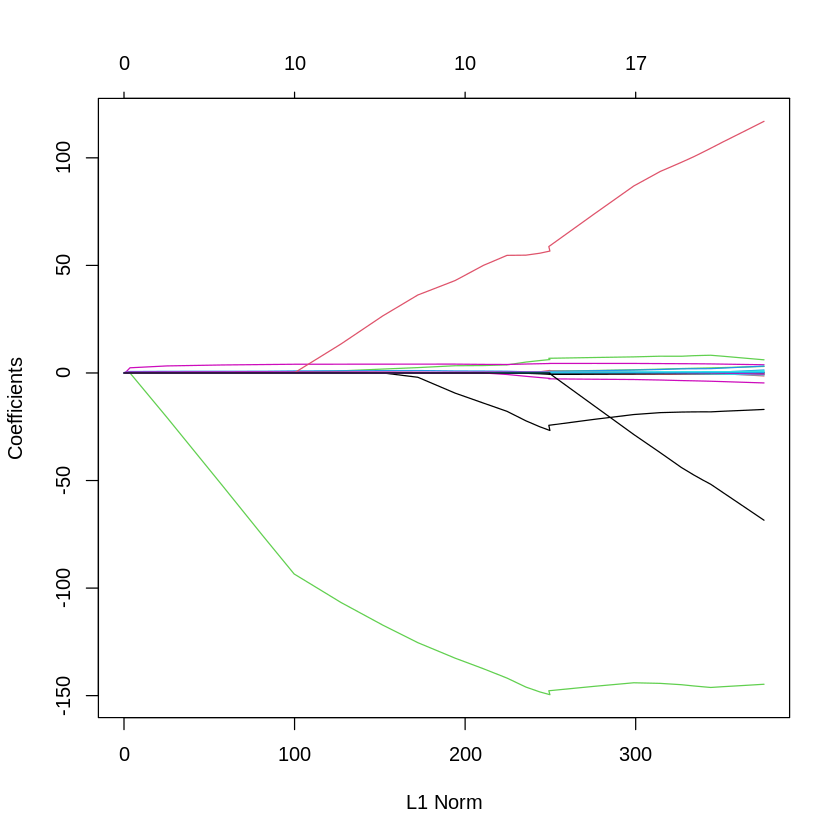

In [102]:
lasso.mod <- glmnet(x[train, ], y[train], alpha = 1, lambda = grid)
plot(lasso.mod)

[1] 143673.6

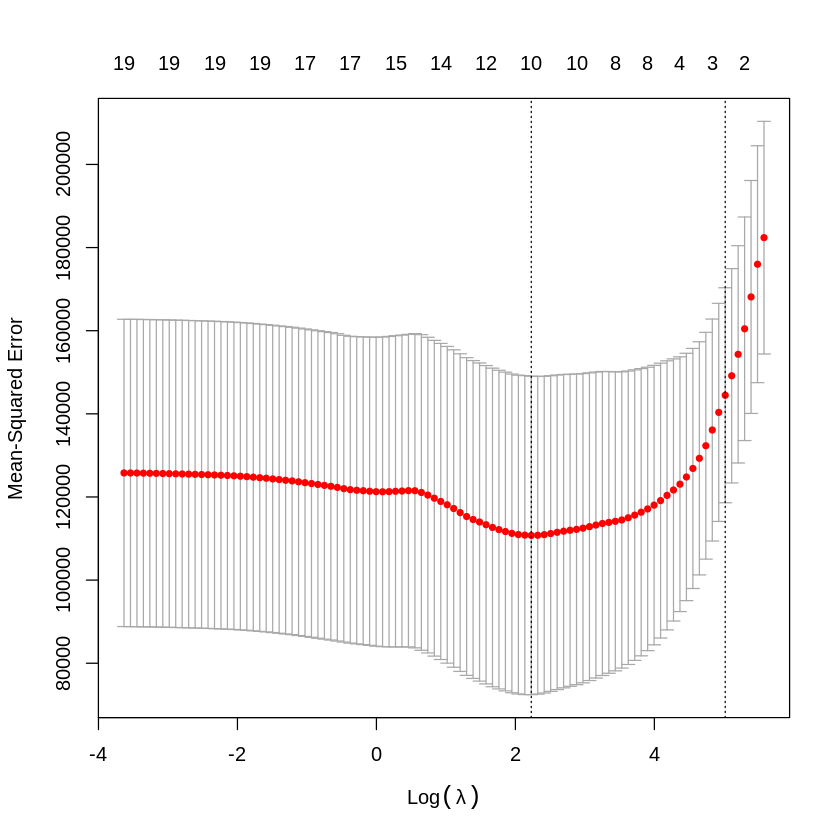

In [103]:
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 1)
plot(cv.out)
bestlam <- cv.out$lambda.min
lasso.pred <- predict(lasso.mod, s = bestlam, newx = x[test, ])
mean((lasso.pred - y.test)^2)

In [104]:
out <- glmnet(x, y, alpha = 1, lambda = grid)
lasso.coef <- predict(out, type = "coefficients", s = bestlam)[1:20, ]
lasso.coef

(Intercept)         AtBat          Hits         HmRun          Runs 
   1.27479059   -0.05497143    2.18034583    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.29192406   -0.33806109    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.02825013    0.21628385    0.41712537    0.00000000   20.28615023 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.16755870    0.23752385    0.00000000   -0.85629148    0.00000000

# Lecture 08 R Code
lecture_08_R_code.R

In [105]:
install.packages("caret")
install.packages("plotmo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [107]:
library(tidyverse)
library(glmnet)
library(caret)
library(plotmo)

In [108]:
# load the prostate data
prostate_data <- read_csv("/content/prostate_data.csv")

Rows: 97 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45, lpsa
lgl (1): train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [109]:
# scale predictor variables, split into train/test sets
prostate_data_sc <- as.data.frame(scale(prostate_data[,1:8]))
prostate_data_sc$lpsa <- prostate_data$lpsa
prostate_data_sc$train <- prostate_data$train
prostate_data_sc_train <- prostate_data_sc[prostate_data_sc$train == TRUE,]
prostate_data_sc_test <- prostate_data_sc[prostate_data_sc$train == FALSE,]

In [110]:
# linear model with all predictor variables
lin_mod <- lm(lpsa ~ . - train, data = prostate_data_sc_train)
summary(lin_mod)
coef_lses <- coef(lin_mod)


Call:
lm(formula = lpsa ~ . - train, data = prostate_data_sc_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64870 -0.34147 -0.05424  0.44941  1.48675 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.46493    0.08931  27.598  < 2e-16 ***
lcavol       0.67953    0.12663   5.366 1.47e-06 ***
lweight      0.26305    0.09563   2.751  0.00792 ** 
age         -0.14146    0.10134  -1.396  0.16806    
lbph         0.21015    0.10222   2.056  0.04431 *  
svi          0.30520    0.12360   2.469  0.01651 *  
lcp         -0.28849    0.15453  -1.867  0.06697 .  
gleason     -0.02131    0.14525  -0.147  0.88389    
pgg45        0.26696    0.15361   1.738  0.08755 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7123 on 58 degrees of freedom
Multiple R-squared:  0.6944,	Adjusted R-squared:  0.6522 
F-statistic: 16.47 on 8 and 58 DF,  p-value: 2.042e-12


## Ridge Regression with glmnet() and train()

In [111]:
# note on scaling

# ridge regression with glmnet (from glmnet package)
# the glmnet() function fits the "complete" solution paths
prostate_data_sc_train_X <- as.matrix(prostate_data_sc_train[,1:8])
prostate_data_sc_train_Y <- prostate_data_sc_train[,9]
prostate_ridge <- glmnet(x = prostate_data_sc_train_X,
                         y = prostate_data_sc_train_Y,
                         alpha = 0.0)

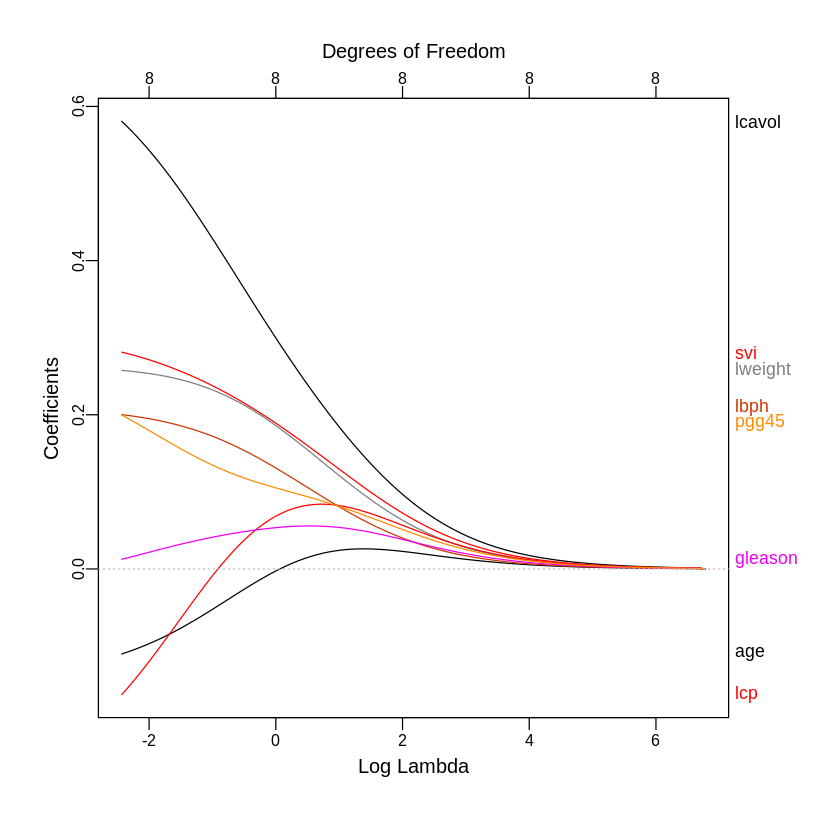

In [112]:
# plot solutions paths (from plotmo package)
plot_glmnet(prostate_ridge, xvar = "lambda")

In [113]:
# use 10-fold CV to select the tuning parameter lambda
set.seed(1234)
prostate_ridge_cv <- cv.glmnet(x = prostate_data_sc_train_X,
                               y = prostate_data_sc_train_Y,
                               alpha = 0.0, nfolds = 10)
prostate_ridge_cv


Call:  cv.glmnet(x = prostate_data_sc_train_X, y = prostate_data_sc_train_Y,      nfolds = 10, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min 0.0879   100  0.5802 0.1391       8
1se 1.4324    70  0.7099 0.1281       8

In [114]:
# look at solution corresponding to selected lambda based on minimum 10-fold CV MSE
# note that this model is fit on the entire training data set
predict(prostate_ridge, s = prostate_ridge_cv$lambda.min, type = "coef")

# look at solution corresponding to selected lambda based on 10-fold CV MSE with 1SE rule
predict(prostate_ridge, s = prostate_ridge_cv$lambda.1se, type = "coef")

# predict lpsa in test set for model based on minimum 10-fold CV MSE
prostate_data_sc_test_X <- as.matrix(prostate_data_sc_test[,1:8])
pred_ridge_test <- predict(prostate_ridge, s = prostate_ridge_cv$lambda.min,
                           newx = prostate_data_sc_test_X)

9 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept)  2.46700218
lcavol       0.58065709
lweight      0.25757270
age         -0.11032355
lbph         0.20016172
svi          0.28122176
lcp         -0.16310975
gleason      0.01246117
pgg45        0.19962384

9 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept) 2.45647499
lcavol      0.25567816
lweight     0.16365226
age         0.01071222
lbph        0.11292369
svi         0.16843793
lcp         0.08030694
gleason     0.05552628
pgg45       0.09695531

In [115]:
# compute test MSE based on test set
mean((prostate_data_sc_test$lpsa - pred_ridge_test)^2)

# note that the results above can also be obtained via the train()
#  function from the caret package but we need to specify a grid of values for
#  tuning parameter lambda; fortunately, we can get this from the glmnet function

# set up a ridge regression tuneGrid object - be sure to set alpha = 0
tg_ridge <- data.frame(alpha = 0, lambda = prostate_ridge$lambda)

# conduct 10-fold CV to determine optimal lambda value
set.seed(1234)
rdg_lpsa_10cv <- train(x = prostate_data_sc_train_X, y = prostate_data_sc_train_Y,
                       method = "glmnet", tuneGrid = tg_ridge,
                       trControl = trainControl(method = "cv", number = 10,
                                                selectionFunction = "best"))

[1] 0.4943793

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


glmnet 

67 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 59, 61, 59, 60, 61, 62, ... 
Resampling results across tuning parameters:

  lambda        RMSE       Rsquared   MAE      
    0.08788804  0.7484964  0.6597440  0.5812684
    0.09645702  0.7494473  0.6595217  0.5823881
    0.10586146  0.7496536  0.6599409  0.5824943
    0.11618282  0.7499562  0.6603508  0.5827056
    0.12751050  0.7503644  0.6607463  0.5829704
    0.13994262  0.7508902  0.6611196  0.5832596
    0.15358685  0.7515385  0.6614656  0.5835644
    0.16856138  0.7523171  0.6617809  0.5838833
    0.18499590  0.7532374  0.6620548  0.5843537
    0.20303277  0.7543079  0.6622823  0.5851999
    0.22282822  0.7555266  0.6624567  0.5866833
    0.24455370  0.7569125  0.6625739  0.5884937
    0.26839738  0.7584741  0.6626245  0.5904376
    0.29456579  0.7602131  0.6626020  0.5924282
    0.32328559  0.7621358  0.6625001  0.5944598
    0.35480554  0.7642514  0.6623129  0.5

,s0
1,2.445522
2,2.446438
3,2.447942
4,2.446173
5,2.448516
6,2.445835
8,2.449303
11,2.448471
12,2.447594
13,2.450709


,LSEs,Ridge
(Intercept),2.46493292,2.46700218
lcavol,0.67952814,0.58065709
lweight,0.26305307,0.25757270
age,-0.14146483,-0.11032355
lbph,0.21014656,0.20016172
svi,0.30520060,0.28122176
lcp,-0.28849277,-0.16310975
gleason,-0.02130504,0.01246117
pgg45,0.26695576,0.19962384


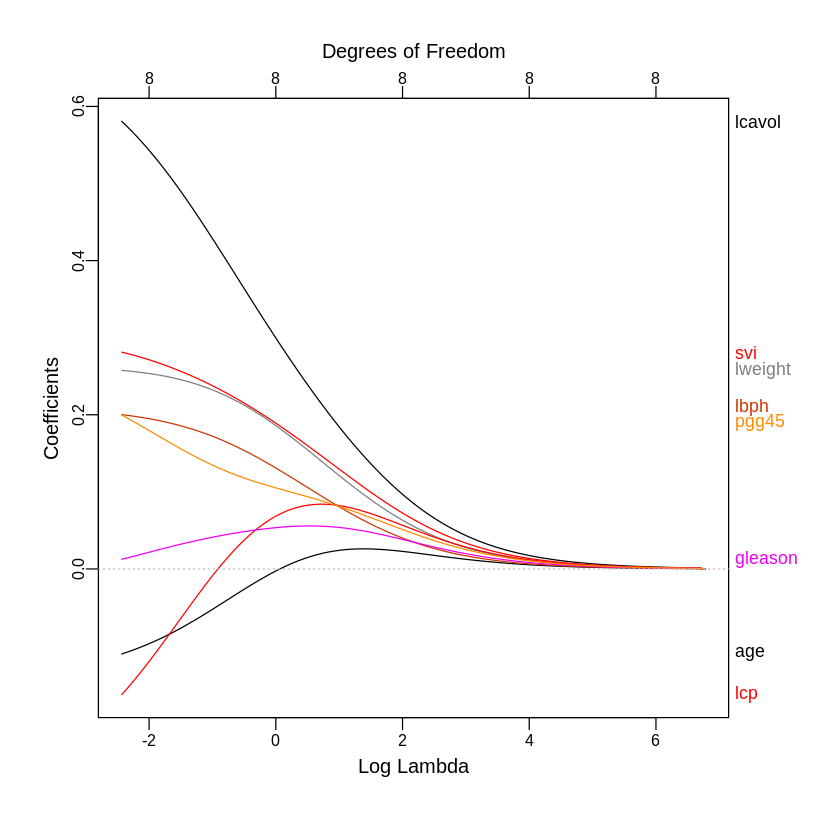

In [116]:
rdg_lpsa_10cv
# note that the selected lambda is the same as the one selected above, this will not be true in general


# warning ok - often happens when a model produces the same or nearly the predictions for all samples -
#  as would be the case with the large lambda value of 878.88041366 (largest lambda), see code below
check_01 <- glmnet(x = prostate_data_sc_train_X,
                   y = prostate_data_sc_train_Y, alpha = 0,
                   lambda = 878.88041366)
predict(check_01, newx = prostate_data_sc_train_X)

# can use the finalModel object as you would the glmnet object
# plot solution paths
plot_glmnet(rdg_lpsa_10cv$finalModel, xvar = "lambda")
# look at coefficients for selected model
coef_ridge_lambdamin <- predict(rdg_lpsa_10cv$finalModel, s = rdg_lpsa_10cv$bestTune$lambda, type = "coef")

# let's compare the ridge estimates with the LSEs
cbind(LSEs = coef_lses, Ridge = coef_ridge_lambdamin[,1])

## LASSO Regression with glmnet() and train()

In [117]:
# LASSO regression with glmnet (from glmnet package)
# the glmnet() function fits the "complete" solution paths
prostate_lasso <- glmnet(x = prostate_data_sc_train_X,
                         y = prostate_data_sc_train_Y,
                         alpha = 1)

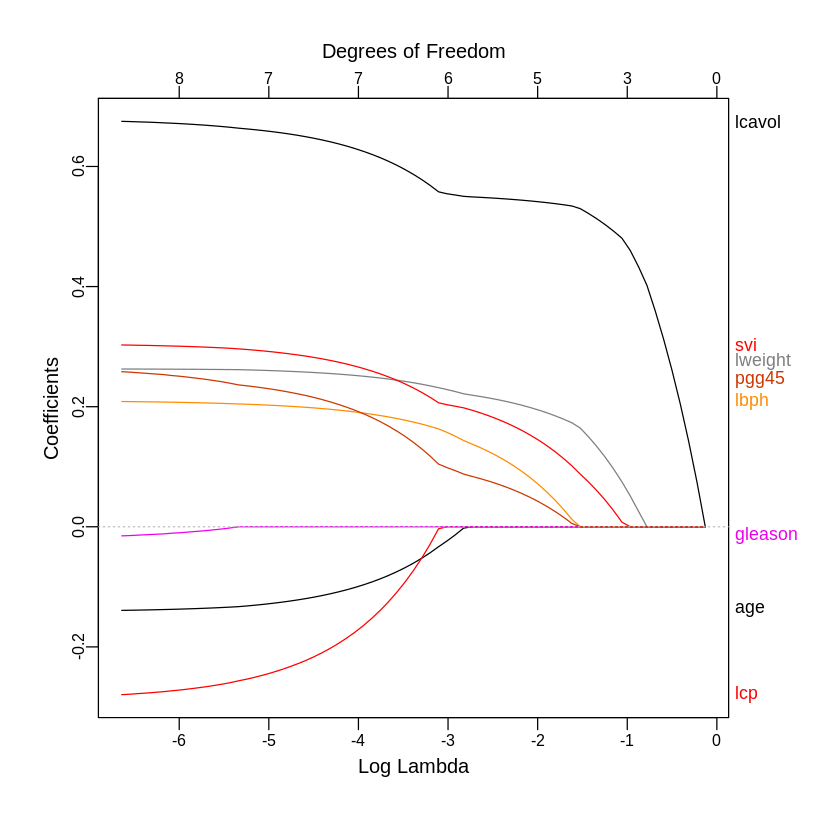

In [118]:
# plot solutions paths (from plotmo package)
plot_glmnet(prostate_lasso, xvar = "lambda")

In [119]:
# use 10-fold CV to select the tuning parameter lambda
set.seed(1234)
prostate_lasso_cv <- cv.glmnet(x = prostate_data_sc_train_X,
                               y = prostate_data_sc_train_Y,
                               alpha = 1, nfolds = 10)
prostate_lasso_cv


Call:  cv.glmnet(x = prostate_data_sc_train_X, y = prostate_data_sc_train_Y,      nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Index Measure     SE Nonzero
min 0.01217    47  0.5838 0.1363       7
1se 0.23893    15  0.7178 0.1190       3

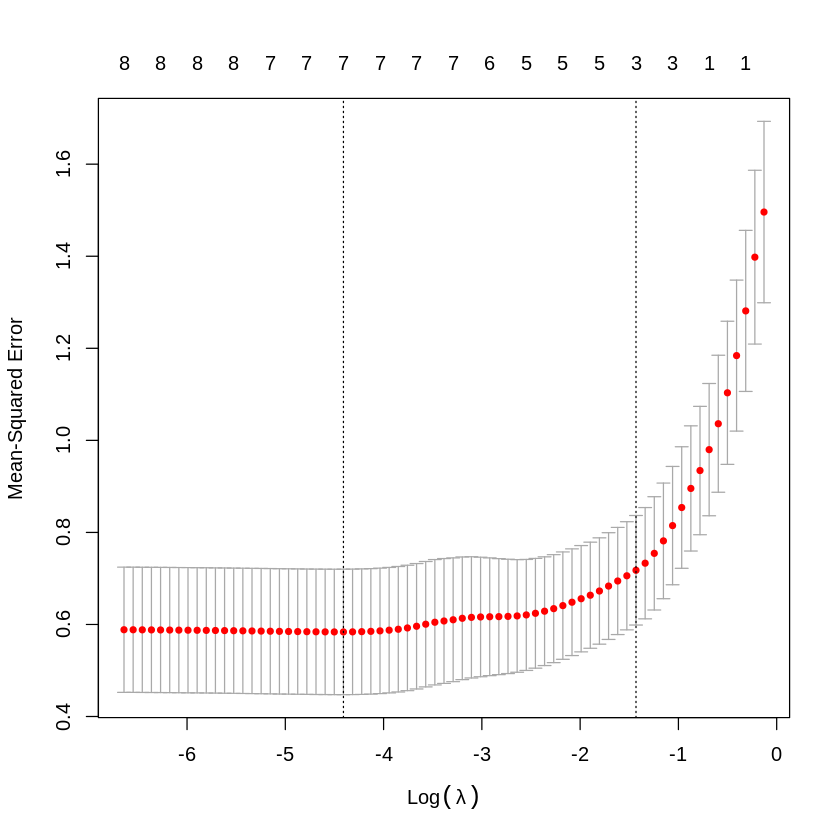

In [120]:
# we can make a plot of the estimated 10-fold CV MSEs and 1SE intervals
# left dotted vertical line corresponds to lambda giving minimum CV MSE
# right dotted vertical line corresponds to max lambda whose CV MSE is within
#   1SE of the minimum CV MSE
plot(prostate_lasso_cv)

In [121]:
# look at solution corresponding to selected lambda based on minimum 10-fold CV MSE
# note that this model is fit on the entire training data set
predict(prostate_lasso, s = prostate_lasso_cv$lambda.min, type = "coef")

# look at solution corresponding to selected lambda based on 10-fold CV MSE with 1SE rule
predict(prostate_lasso, s = prostate_lasso_cv$lambda.1se, type = "coef")

# predict lpsa in test set for model based on minimum 10-fold CV MSE
pred_lasso_test <- predict(prostate_lasso, s = prostate_lasso_cv$lambda.min,
                           newx = prostate_data_sc_test_X)

# compute test MSE based on test set
mean((prostate_data_sc_test$lpsa - pred_lasso_test)^2)

9 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept)  2.4670696
lcavol       0.6442549
lweight      0.2561131
age         -0.1146071
lbph         0.1968825
svi          0.2797443
lcp         -0.2099688
gleason      .        
pgg45        0.2119822

9 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept) 2.46816797
lcavol      0.52164733
lweight     0.14967469
age         .         
lbph        .         
svi         0.07455544
lcp         .         
gleason     .         
pgg45       .         

[1] 0.4950821

In [122]:
# note that the results above can also be obtained via the train()
#  function from the caret package but we need to specify a grid of values for
#  tuning parameter lambda; fortunately, we can get this from the glmnet function

# set up a ridge regression tuneGrid object - be sure to set alpha = 1
tg_lasso <- data.frame(alpha = 1, lambda = prostate_lasso$lambda)

# conduct 10-fold CV to determine optimal lambda value
set.seed(1234)
lasso_lpsa_10cv <- train(x = prostate_data_sc_train_X, y = prostate_data_sc_train_Y,
                         method = "glmnet", tuneGrid = tg_lasso,
                         trControl = trainControl(method = "cv", number = 10,
                                                  selectionFunction = "best"))

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


glmnet 

67 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 59, 61, 59, 60, 61, 62, ... 
Resampling results across tuning parameters:

  lambda       RMSE       Rsquared   MAE      
  0.001305110  0.7558109  0.6517586  0.5938148
  0.001432356  0.7557476  0.6518087  0.5937757
  0.001572009  0.7556944  0.6518744  0.5937636
  0.001725278  0.7556124  0.6519226  0.5937138
  0.001893490  0.7555188  0.6519935  0.5936496
  0.002078103  0.7554185  0.6520622  0.5935692
  0.002280716  0.7553153  0.6521395  0.5934836
  0.002503083  0.7552047  0.6522309  0.5933873
  0.002747130  0.7550780  0.6523244  0.5932805
  0.003014972  0.7549458  0.6524208  0.5931730
  0.003308928  0.7547973  0.6525262  0.5930485
  0.003631545  0.7546370  0.6526437  0.5929125
  0.003985616  0.7544501  0.6527758  0.5927454
  0.004374209  0.7542681  0.6529099  0.5925783
  0.004800688  0.7540777  0.6530581  0.5923998
  0.005268750  0.7538671  0.6532154  0.5921948
  0.005782

,LSEs,Ridge,LASSO
(Intercept),2.46493292,2.46700218,2.4670696
lcavol,0.67952814,0.58065709,0.6442549
lweight,0.26305307,0.25757270,0.2561131
age,-0.14146483,-0.11032355,-0.1146071
lbph,0.21014656,0.20016172,0.1968825
svi,0.30520060,0.28122176,0.2797443
lcp,-0.28849277,-0.16310975,-0.2099688
gleason,-0.02130504,0.01246117,0.0000000
pgg45,0.26695576,0.19962384,0.2119822


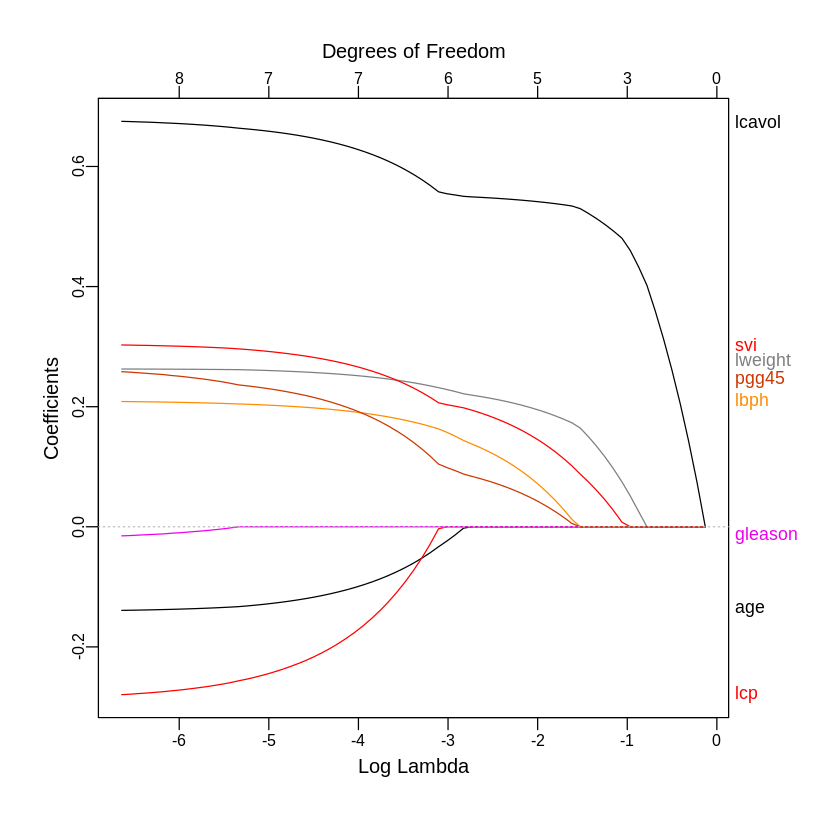

In [123]:
# warning OK here
lasso_lpsa_10cv

# can use the finalModel object as you would the glmnet object
# plot solution paths
plot_glmnet(lasso_lpsa_10cv$finalModel, xvar = "lambda")
# look at coefficients for selected model
coef_lasso_lambdamin <- predict(lasso_lpsa_10cv$finalModel, s = lasso_lpsa_10cv$bestTune$lambda, type = "coef")

# let's compare the LASSO estimates with the ridge estimates and LSEs
cbind(LSEs = coef_lses, Ridge = coef_ridge_lambdamin[,1], LASSO = coef_lasso_lambdamin[,1])

## Ridge and LASSO Regression for Classification

In [124]:
# The glmnet() function can also fit some GLMs via penalized maximum likelihood
#  estimation.  Specifically, we can fit binary logistic and multinomial logistic models.

# load the heart data
heart_data <- read_csv("/content/Heart.csv")
# some subjects have missing values for CA and Thal variables, we will remove these
heart_data <- heart_data[-which(!complete.cases(heart_data)),]
head(heart_data)
# note that some variables are categorical and treated as factor and character variables in R

# set up predictor matrix and response vector
heart_Y <- heart_data$AHD

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): ChestPain, Thal, AHD
dbl (11): Age, Sex, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
56,1,nontypical,120,236,0,0,178,0,0.8,1,0,normal,No


In [125]:
# since the predictors are a mix of numerical and categorical variables,
# it is simplest to set up a model matrix that converts categorical variables
#  to sets of dummy variables
f1 <- formula(AHD ~ Age + Sex + ChestPain + RestBP + Chol + Fbs + RestECG + MaxHR +
                ExAng + Oldpeak + Slope + Ca + Thal)
mf <- model.frame(f1, data = heart_data)
heart_X <- model.matrix(mf, data = heart_data)[,-1] # remove the intercept column

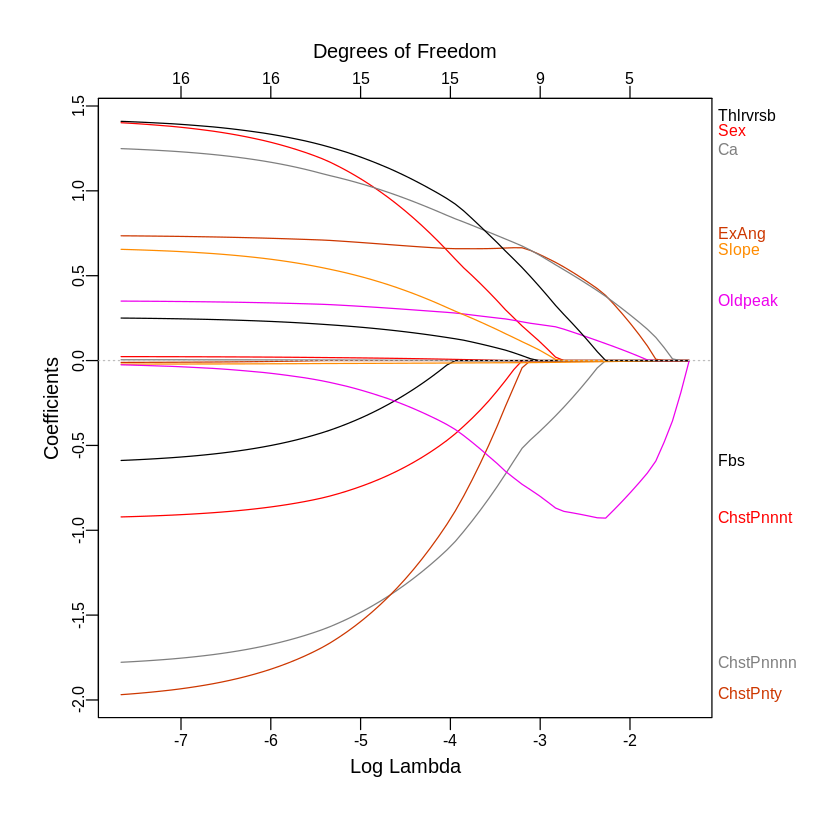

In [126]:
# compute the solution paths for a LASSO logistic model with AHD as the response
#  and the first 13 columns as the predictors using glmnet() and cv.glmnet()
heart_lasso <- glmnet(x = heart_X, y = heart_Y, family = "binomial", alpha = 1)

# plot solution paths
plot_glmnet(heart_lasso, xvar = "lambda")

In [127]:
# determine optimal lambda using 10-fold CV
set.seed(1234)
heart_lasso_cv <- cv.glmnet(x = heart_X, y = heart_Y, family = "binomial", alpha = 1)
heart_lasso_cv


Call:  cv.glmnet(x = heart_X, y = heart_Y, family = "binomial", alpha = 1) 

Measure: Binomial Deviance 

     Lambda Index Measure      SE Nonzero
min 0.00837    38  0.8052 0.07753      15
1se 0.04904    19  0.8799 0.05259       9

In [128]:
# By default the error measure used is the deviance but we may be interested in
#  using some other value, like AUC.  To specify this, we can use the type.measure argument
set.seed(1234)
heart_lasso_cv_auc <- cv.glmnet(x = heart_X, y = heart_Y, family = "binomial",
                                alpha = 1, type.measure = "auc")
heart_lasso_cv_auc


Call:  cv.glmnet(x = heart_X, y = heart_Y, type.measure = "auc", family = "binomial",      alpha = 1) 

Measure: AUC 

     Lambda Index Measure      SE Nonzero
min 0.00919    37  0.9039 0.01861      15
1se 0.08569    13  0.8866 0.02202       7

In [129]:
# look at coefficients for LASSO logistic model with lambda based on 10-fold CV AUC with 1SE rule
predict(heart_lasso, s = heart_lasso_cv_auc$lambda.1se, type = "coef")

# to do all of this with the train() function we use the following:
# set up a ridge regression tuneGrid object - be sure to set alpha = 1
tg_lasso2 <- data.frame(alpha = 1, lambda = heart_lasso$lambda)

# conduct 10-fold CV to determine optimal lambda value
set.seed(1234)
lasso_heart_10cv <- train(x = heart_X, y = heart_Y, method = "glmnet",
                          family = "binomial", tuneGrid = tg_lasso2,
                          trControl = trainControl(method = "cv", number = 10,
                                                   summaryFunction = twoClassSummary,
                                                   classProbs = TRUE, savePredictions = TRUE,
                                                   selectionFunction = "oneSE"))

lasso_heart_10cv

17 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)          0.906135414
Age                  .          
Sex                  .          
ChestPainnonanginal -0.104498937
ChestPainnontypical  .          
ChestPaintypical     .          
RestBP               .          
Chol                 .          
Fbs                  .          
RestECG              .          
MaxHR               -0.007821753
ExAng                0.458063970
Oldpeak              0.134787904
Slope                .          
Ca                   0.443823773
Thalnormal          -0.916157889
Thalreversable       0.109835075

Warning message in train.default(x = heart_X, y = heart_Y, method = "glmnet", family = "binomial", :
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


glmnet 

297 samples
 16 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 268, 268, 267, 267, 267, 267, ... 
Resampling results across tuning parameters:

  lambda        ROC        Sens     Spec      
  0.0004680854  0.9146635  0.89375  0.78901099
  0.0005137232  0.9146635  0.89375  0.78901099
  0.0005638105  0.9151099  0.89375  0.78901099
  0.0006187814  0.9146635  0.89375  0.78901099
  0.0006791118  0.9146635  0.89375  0.78901099
  0.0007453244  0.9151099  0.89375  0.78901099
  0.0008179926  0.9151099  0.89375  0.78901099
  0.0008977458  0.9151099  0.89375  0.78901099
  0.0009852749  0.9146635  0.89375  0.78901099
  0.0010813380  0.9151442  0.89375  0.78901099
  0.0011867672  0.9151442  0.89375  0.78901099
  0.0013024755  0.9160371  0.89375  0.78901099
  0.0014294652  0.9160371  0.89375  0.78901099
  0.0015688363  0.9160371  0.89375  0.78901099
  0.0017217959  0.9160371  0.89375  0.78901099
  0.0018896689  0.91603

In [130]:
# look at selected model coefficients
predict(lasso_heart_10cv$finalModel, s = lasso_heart_10cv$bestTune$lambda, type = "coef")


# as with other logistic models, we can determine an optimal threshold
# first, provide a sequence of threshold values
prob_thresh <- seq(0.10, 0.90, by = 0.10)

# use thresholder() function to obtain accuracy measures at each threshold
#  if we specify final = TRUE, then the model with lambda = 0.1243276 will only be considered
#  if we specify final = FALSE, then models for all lambdas will be considered (this can be computationally intensive)
lasso_heart_ths <- thresholder(lasso_heart_10cv, threshold = prob_thresh, final = FALSE,
                               statistics = c("Sensitivity", "Specificity", "Accuracy", "Kappa")) # also try "all"
lasso_heart_ths

# which lambda and threshold combination yields highest accuracy
which.max(lasso_heart_ths$Accuracy)
# but be careful - there may be multiple combinations that yield the same high accuracy
lasso_heart_ths[rev(order(lasso_heart_ths$Accuracy)),]

17 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)          0.608849261
Age                  .          
Sex                  .          
ChestPainnonanginal  .          
ChestPainnontypical  .          
ChestPaintypical     .          
RestBP               .          
Chol                 .          
Fbs                  .          
RestECG              .          
MaxHR               -0.004535215
ExAng                0.274964958
Oldpeak              0.063435618
Slope                .          
Ca                   0.304695635
Thalnormal          -0.828498997
Thalreversable       .          

alpha,lambda,prob_threshold,Sensitivity,Specificity,Accuracy,Kappa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0004680854,0.1,0.96250,0.5461538,0.7709195,0.5223039
1,0.0004680854,0.2,0.95625,0.6340659,0.8079310,0.6028541
1,0.0004680854,0.3,0.94375,0.6923077,0.8281609,0.6465365
1,0.0004680854,0.4,0.91250,0.7510989,0.8383908,0.6698687
1,0.0004680854,0.5,0.89375,0.7890110,0.8455172,0.6862381
1,0.0004680854,0.6,0.82500,0.8472527,0.8355172,0.6702862
1,0.0004680854,0.7,0.74375,0.8615385,0.7980460,0.5989567
1,0.0004680854,0.8,0.65000,0.9131868,0.7712644,0.5509899
1,0.0004680854,0.9,0.47500,0.9637363,0.7004598,0.4223482


[1] 5

,alpha,lambda,prob_threshold,Sensitivity,Specificity,Accuracy,Kappa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
149,1,0.0020739093,0.5,0.89375,0.7890110,0.8455172,0.6862381
140,1,0.0018896689,0.5,0.89375,0.7890110,0.8455172,0.6862381
131,1,0.0017217959,0.5,0.89375,0.7890110,0.8455172,0.6862381
122,1,0.0015688363,0.5,0.89375,0.7890110,0.8455172,0.6862381
113,1,0.0014294652,0.5,0.89375,0.7890110,0.8455172,0.6862381
104,1,0.0013024755,0.5,0.89375,0.7890110,0.8455172,0.6862381
95,1,0.0011867672,0.5,0.89375,0.7890110,0.8455172,0.6862381
86,1,0.0010813380,0.5,0.89375,0.7890110,0.8455172,0.6862381
77,1,0.0009852749,0.5,0.89375,0.7890110,0.8455172,0.6862381
